# Data Science and Business Analytics - Task 1

## Prediction using Supervised Machine Learning

### This task will represent

A simple linear regression involving two variables.

Predicts the percentage of a student based on the no. of study hours.

### Presented by : Januka Shehan Fernando

In [72]:
# Importing relevant libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [74]:
# Importing data with the help of the given URL

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [75]:
# Reading some rows of the data imported.

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### EDA Process

In [76]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [77]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [79]:
## We can conclude that there are no any missing data in the dataframe.

In [80]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [81]:
corr = df.corr()

<AxesSubplot:>

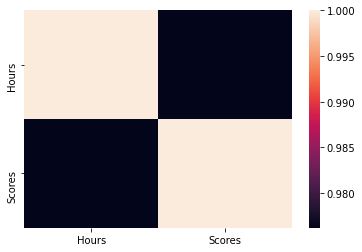

In [82]:
sb.heatmap(corr)

In [83]:
## We can conclude that the dataset is having more likely a normal distribution. 
## There is strong correlation between the two columns 'Hours' and 'Scores'.

### Distribution of the Dataset

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

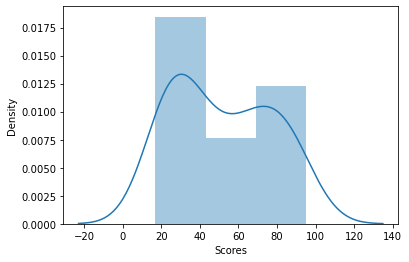

In [84]:
sb.distplot(df["Scores"])

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

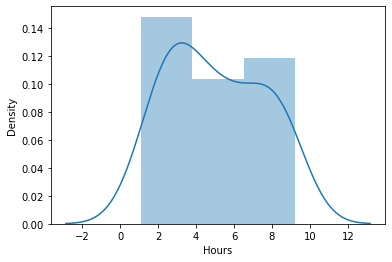

In [85]:
sb.distplot(df["Hours"])

In [86]:
# Plotting the distribution of the Scores regarding to the study hours

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


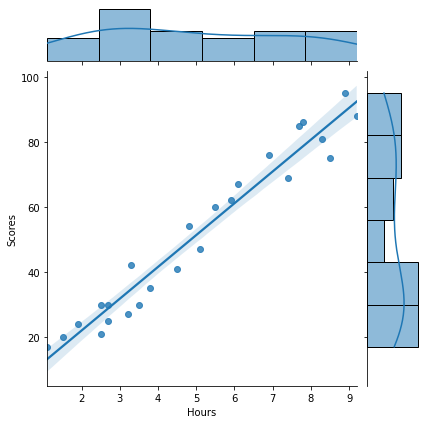

In [87]:
sb.jointplot(df['Hours'], df['Scores'], kind='reg')

In [88]:
## We can see the strong linear relationship between the two columns

### Training the Dataset 

In [97]:
x = df[['Hours']].values
y = df['Scores'].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [98]:
# Preparing the dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [99]:
# Importing LinearRegression model from Scikit Learn library

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [100]:
# Training the model

lr.fit(x_train, y_train)

LinearRegression()

D:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

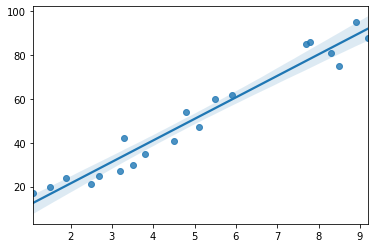

In [101]:
# Plotting the regression line

sb.regplot(x_train, y_train)

### Testing the model by making predictions

In [102]:
y_pred = lr.predict(x_test)
y_pred

array([69.57626303, 61.71150563, 28.28628667, 26.32009732, 74.49173641])

In [103]:
# Comparing the actual results with the test cases

pred_df = pd.DataFrame({'Real' : y_test, 'Predicted' : y_pred})
pred_df

,Real,Predicted
0,76,69.576263
1,67,61.711506
2,30,28.286287
3,30,26.320097
4,69,74.491736


### Test case given in the problem statement

In [104]:
# Checking for 9.25 hours

my_pred = lr.predict([[9.25]])

In [109]:
solution = pd.DataFrame({'No. of Hours' : [9.25], 'Predicted Score': my_pred[0]})
solution

,No. of Hours,Predicted Score
0,9.25,92.678988


### Testing the accuracy

In [111]:
from sklearn import metrics

In [113]:
print("Mean Absolute Error : {}".format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error : 4.51951675063309
